In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
from collections import defaultdict
import seaborn as sns

In [3]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [4]:
topo_to_log_file_dict = {
    "Abilene": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\Abilene_DemandPinning.txt"],
    "B4": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\B4_DemandPinning.txt"],
    "SWAN": ["..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\SWAN_DemandPinning.txt"],
}
topo_to_num_links = {
    "B4": 38,
    "SWAN": 24,
    "Abilene": 26
}
topology_to_threshold_to_gap = defaultdict(dict)

In [5]:
for (topo, log_file_list) in topo_to_log_file_dict.items():
    thresh_list = []
    gap_list = []
    for log_file in log_file_list:
        with open(log_file, "r") as fp:
            link_cap = int(fp.readline())
            for fline in fp.readlines():
                if fline.startswith("#"):
                    continue
                thresh_perc, thresh, opt, heuristic, gap = fline.split(",")
                gap = float(gap)
                thresh_perc = float(thresh_perc)
                norm_gap = gap * 100 / (topo_to_num_links[topo] * link_cap)
                thresh_list.append(thresh_perc)
                gap_list.append(norm_gap)
    thresh_list = np.array(thresh_list)
    gap_list = np.array(gap_list)
    sorted_args = np.argsort(thresh_list)
    topology_to_threshold_to_gap[topo] = (thresh_list[sorted_args], gap_list[sorted_args])

In [6]:
topology_to_threshold_to_gap

defaultdict(dict,
            {'Abilene': (array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
              array([1.61347886e-08, 1.09615385e+01, 2.19230769e+01, 3.26923077e+01,
                     4.00000000e+01, 4.42307692e+01, 4.67307692e+01])),
             'B4': (array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
              array([1.11186895e-08, 1.13157895e+01, 2.27631579e+01, 3.05263158e+01,
                     3.39473684e+01, 3.68421053e+01, 3.82894737e+01])),
             'SWAN': (array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ]),
              array([4.41646019e-08, 4.27083335e+00, 8.54166667e+00, 1.28125000e+01,
                     1.70833333e+01, 2.08333333e+01, 2.56250000e+01]))})

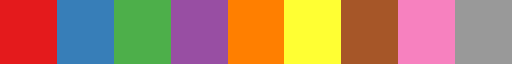

In [7]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [8]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
# colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(4)]
line_styles = ["--", "--", "--", "--"]
markers = ["o", "X", "P"]

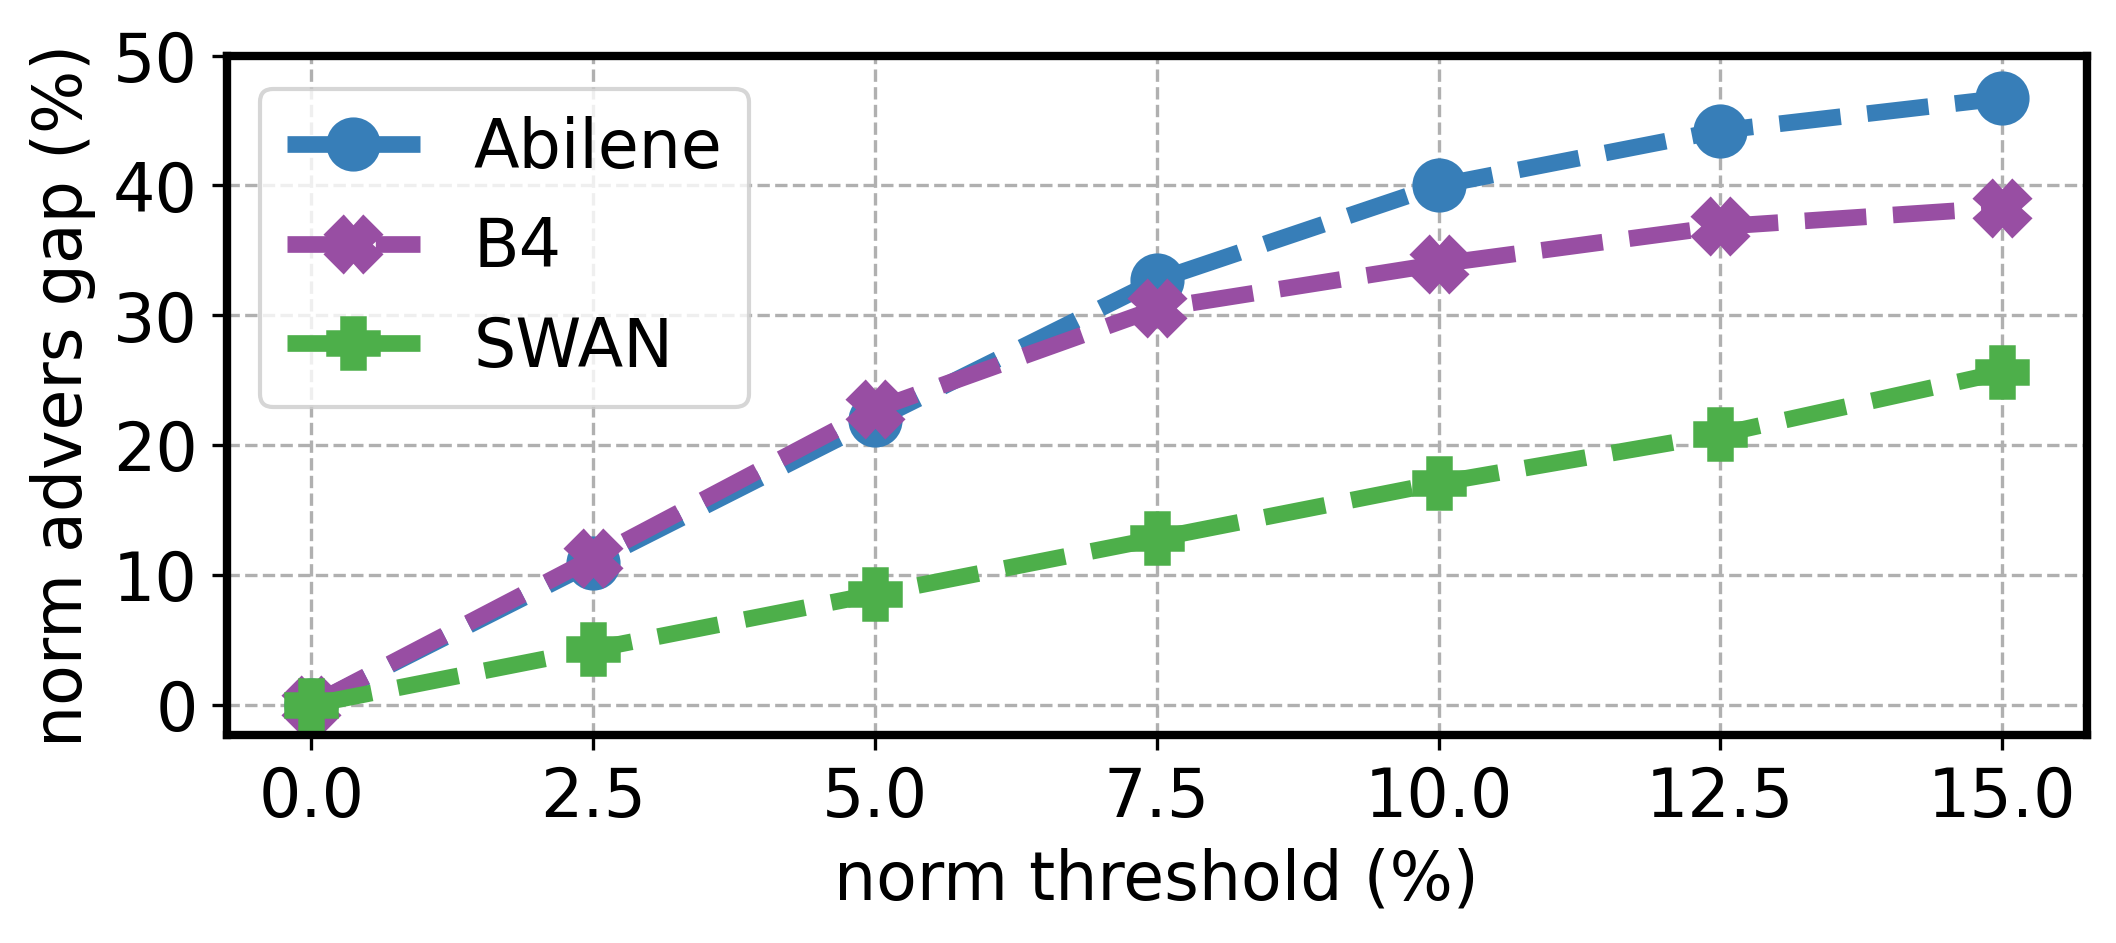

In [12]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
for idx, (topo_name, output) in enumerate(topology_to_threshold_to_gap.items()):
    plt.plot(output[0], output[1], label=f"{topo_name}", 
             color=colors[idx], 
             linestyle=line_styles[idx], 
             marker=markers[idx], 
            #  mfc="white", 
             mec=colors[idx], 
             markersize=10, 
             linewidth=4, 
             markeredgewidth=3
    )

plt.legend(fontsize=16, loc="upper left", ncol=1)
plt.xlabel("norm threshold (%)", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
# plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks([0, 10, 20, 30, 40, 50], fontsize=16)
plt.xticks([0, 2.5, 5, 7.5, 10, 12.5, 15], fontsize=16)
plt.grid(which="major", zorder=-1, linestyle="--")
plt.savefig(output_fig_dir + "demandpinning_sweep_threshold.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "demandpinning_sweep_threshold.pdf", bbox_inches="tight", format="pdf", dpi=300)

In [10]:
topo_to_path_log_file_dict = {
    "B4": ["..\\logs\\path_stat\\2022_6_20_15_42_20_85\\B4.txt"],
    "SWAN": ["..\\logs\\path_stat\\2022_6_20_15_42_20_85\\SWAN.txt"],
    "Abilene": ["..\\logs\\path_stat\\2022_6_20_15_42_20_85\\Abilene.txt"],
}
topology_to_path_cdf = defaultdict(list)
topology_to_diameter = dict()
topology_to_aspl = dict()
topo_to_log_file_dict

{'B4': ['..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\B4_DemandPinning.txt'],
 'SWAN': ['..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\SWAN_DemandPinning.txt'],
 'Abilene': ['..\\logs\\demand_pinning_sweep_thresh\\2022_6_19_11_24_38_978\\Abilene_DemandPinning.txt']}

In [11]:
for (topo, log_file_list) in topo_to_path_log_file_dict.items():
    print(topo)
    plen_cdf = []
    for log_file in log_file_list:
        print(log_file)
        with open(log_file, "r") as fp:
            diameter = int(fp.readline().split("=")[1])
            aspl = float(fp.readline().split("=")[1])
            for fline in fp.readlines():
                if fline.startswith("#"):
                    continue
                plen = int(fline)
                plen_cdf.append(plen)
    topology_to_aspl[topo] = aspl
    topology_to_diameter[topo] = diameter
    topology_to_path_cdf[topo] = plen_cdf

B4
..\logs\path_stat\2022_6_20_15_42_20_85\B4.txt
SWAN
..\logs\path_stat\2022_6_20_15_42_20_85\SWAN.txt
Abilene
..\logs\path_stat\2022_6_20_15_42_20_85\Abilene.txt


In [212]:
topology_to_path_cdf.items()

dict_items([('Abilene', [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6]), ('B4', [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6]), ('SWAN', [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4])])

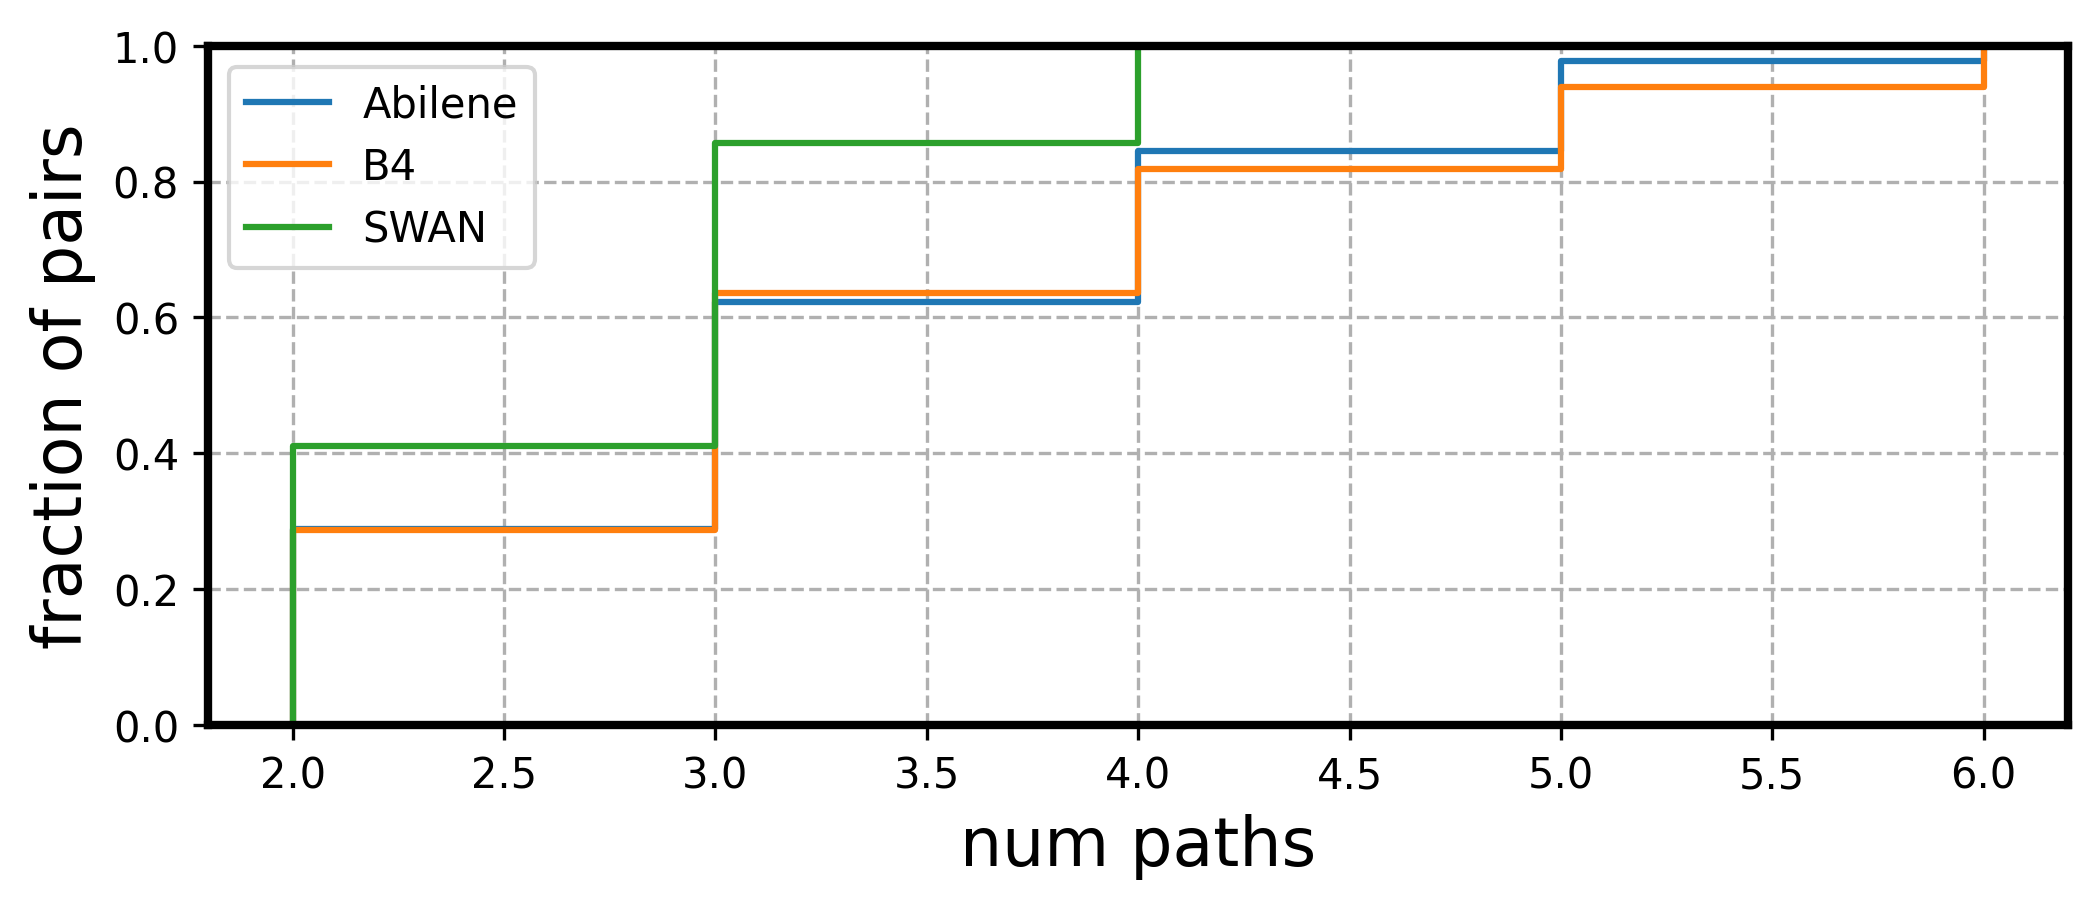

In [222]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
for topo_name, plen_cdf in topology_to_path_cdf.items():
    sns.ecdfplot(plen_cdf, label=topo_name)
plt.legend(fontsize=12, loc="lower right")
plt.xlabel("num paths", fontsize=16)
plt.ylabel("fraction of pairs", fontsize=16)
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.grid(which="major", zorder=-1, linestyle="--")
plt.legend()
plt.show()

In [218]:
topology_to_aspl

{'Abilene': 3.2666666666666666,
 'B4': 3.3181818181818183,
 'SWAN': 2.732142857142857}

In [219]:
topology_to_diameter

{'Abilene': 6, 'B4': 6, 'SWAN': 4}